# In-Vehicle Coupon Recommendation

#### Name:Shalu S

#### Organization:Entri Elevate

#### Date:20-03-2025

# Overview of Problem Statement:


The goal of this study is to determine whether a person will accept a coupon under various driving scenarios. This dataset likely focuses on understanding the factors that influence a person's decision to accept or reject a coupon. If the person accept the coupon are labeled as Y=1 and if the person reject the coupon are labeled as Y=0. This problem can be posed as a binary class classification problem.The aim of this project is to analyze and predict the likelihood of a person accepting a coupon under various driving scenarios.

# Objective


The objective of this project is to develop a machine learning model that can predict whether a person will accept the coupon or reject the coupon.

# Data Description


### source:The dataset is sourced from the https://archive.ics.uci.edu/dataset/603/in+vehicle+coupon+recommendation

#### Features:
The dataset consists of over 12684 data points and 26 attributes, most of the attributes are categorical and some attributes are numeric categorical type.

#### Input Variables
Gender,Age,Marital Status,has_Children,Education,Occupation,Income,,Car, Bar,CoffeeHouse,CarryAway, RestaurantLessThan20, Restaurant20To50, Destination,Passenger,Weather,Temperature,Time,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same, direction_opp,Coupon, Expiration

#### Target Variable
Y: whether the coupon is accepted or rejected, 1:accepted, 0:rejected

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [3]:
data=pd.read_csv('in-vehicle-coupon-recommendation[1].csv')

In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [163]:
df.describe()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.000000,12610.0,12610.0,12610.0,12610.000000
mean,63.267248,0.414512,0.559794,0.0,0.0,1.0,0.567565
std,19.153386,0.492657,0.496432,0.0,0.0,0.0,0.495434
min,30.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000
25%,55.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000
50%,80.000000,0.000000,1.000000,0.0,0.0,1.0,1.000000
75%,80.000000,1.000000,1.000000,0.0,0.0,1.0,1.000000
max,80.000000,1.000000,1.000000,0.0,0.0,1.0,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [14]:
#get the number of rows and columns in the dataframe
df.shape

(12684, 26)

In [16]:
#get the name of the columns in the dataframe
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [18]:
#display the datatype of each column
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

# checking missing values

In [10]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [12]:
df=df.drop(columns=['car'])

In [14]:
df['Bar'] =df['Bar'].fillna(df['Bar'].mode()[0])
df['CoffeeHouse']=df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0])
df['CarryAway']=df['CarryAway'].fillna(df['CarryAway'].mode()[0])
df['RestaurantLessThan20']=df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0])
df['Restaurant20To50']=df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0])

In [16]:
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

# checking duplicates

In [18]:
df.duplicated().sum()

74

In [20]:
# remove duplicates
df = df.drop_duplicates()

In [22]:
df.duplicated().sum()

0

In [24]:
#drop unnecessary column
df = df.drop(columns=['toCoupon_GEQ5min'])

In [ ]:
# visualize numerical and categorical data

In [26]:
numerical_df=df.select_dtypes(include=['number'])

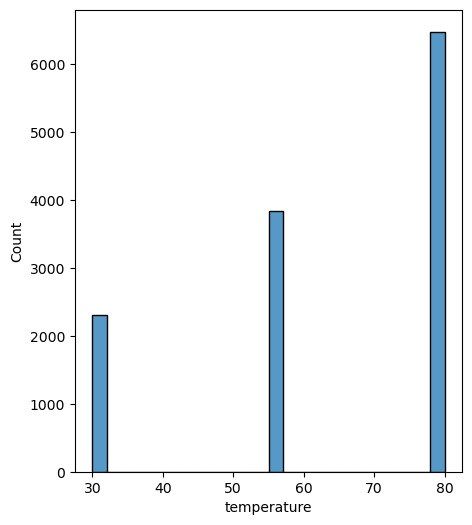

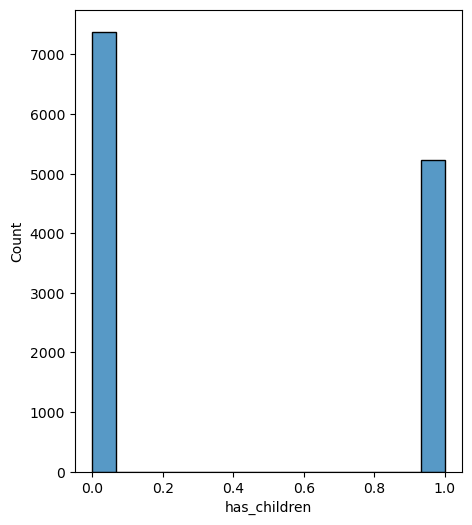

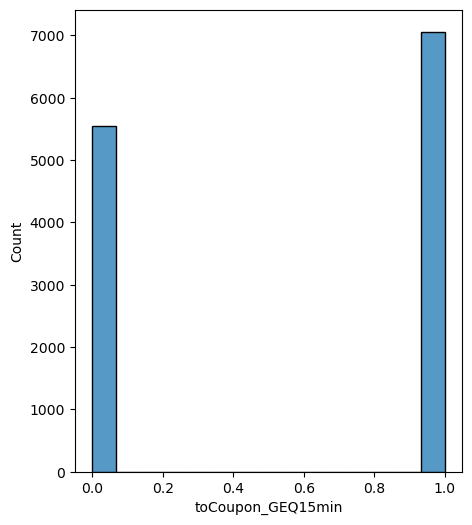

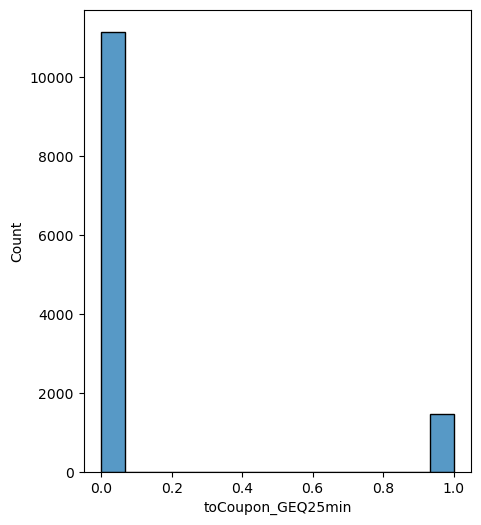

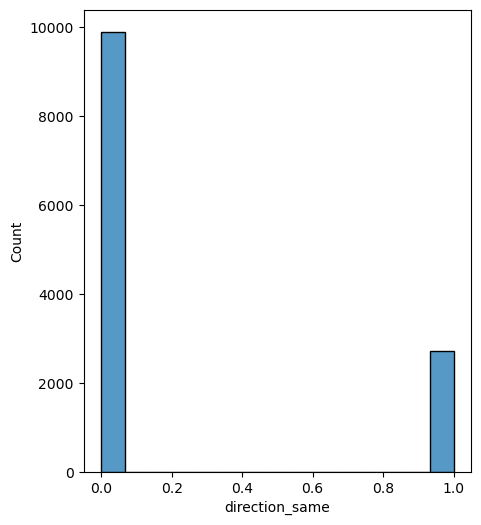

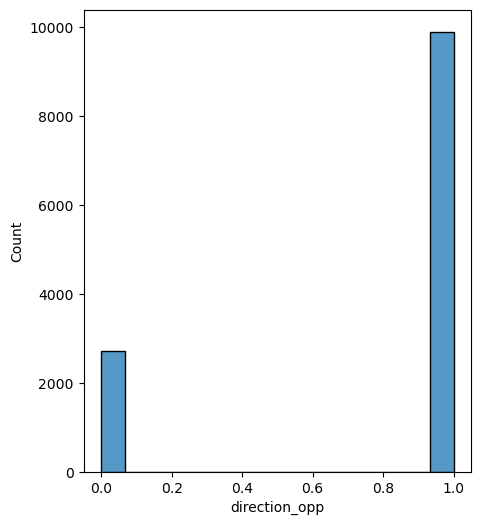

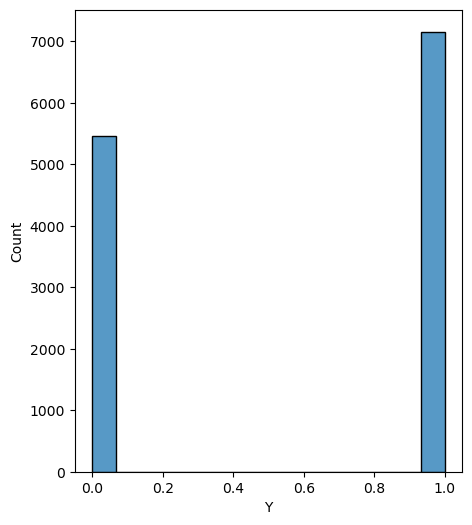

In [28]:
for i in numerical_df:
    plt.figure(figsize=(5, 6))
    sns.histplot(df[i])
    plt.show()

In [30]:
categorical_columns=df.select_dtypes(include=['object'])

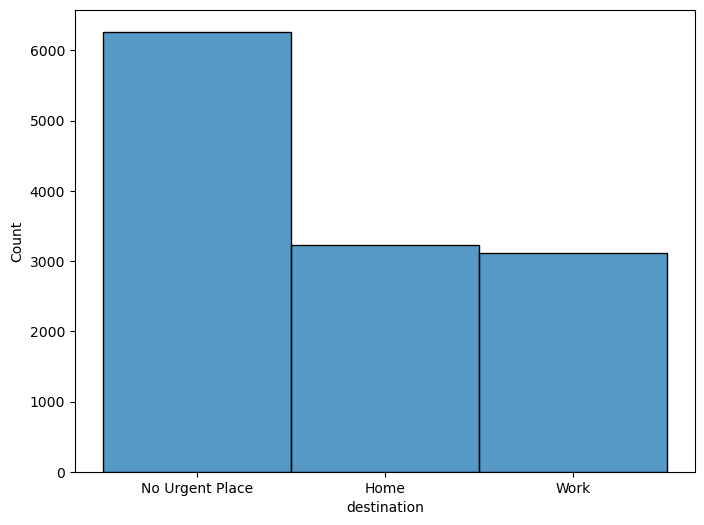

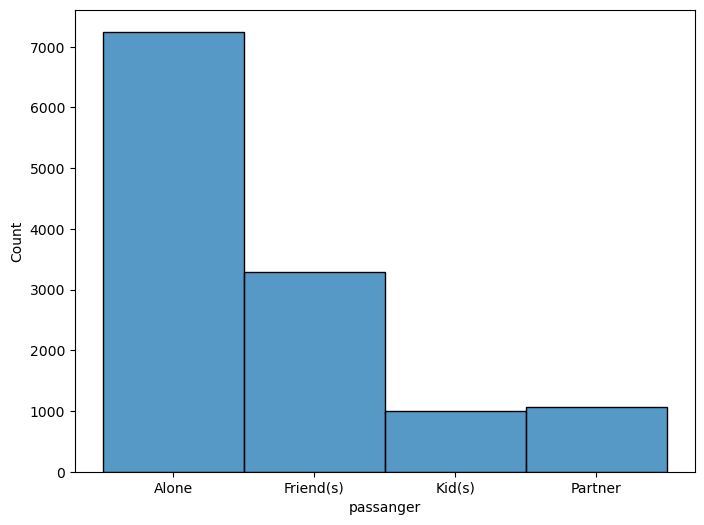

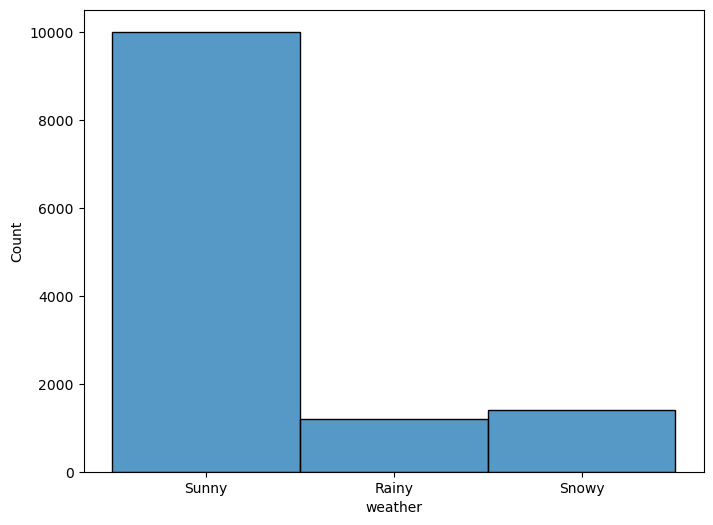

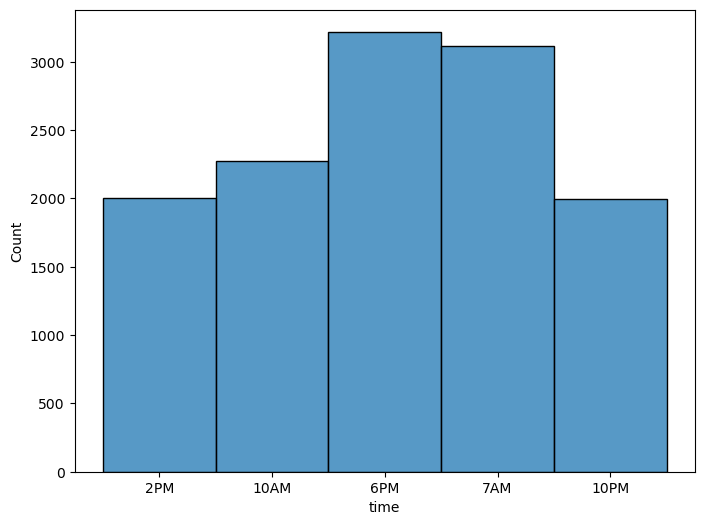

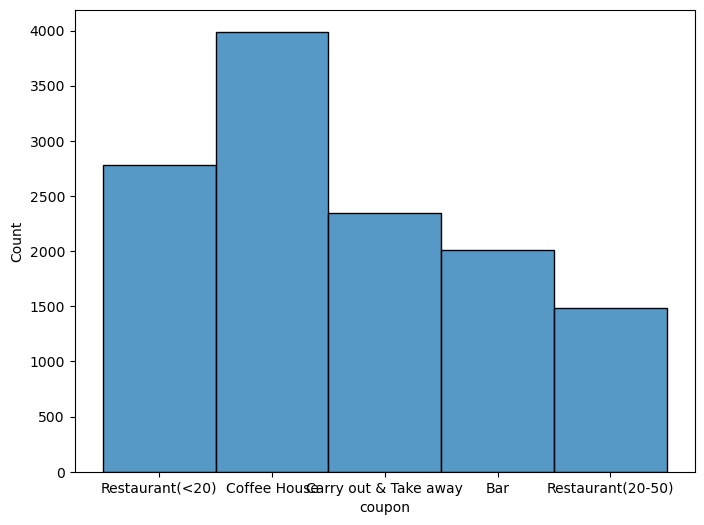

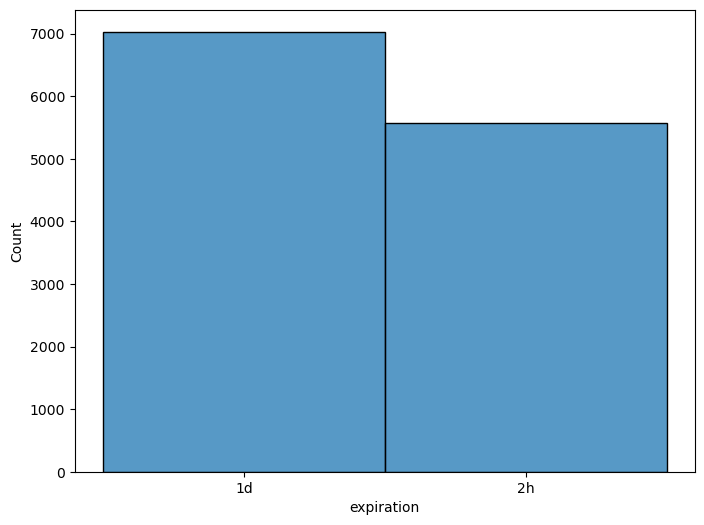

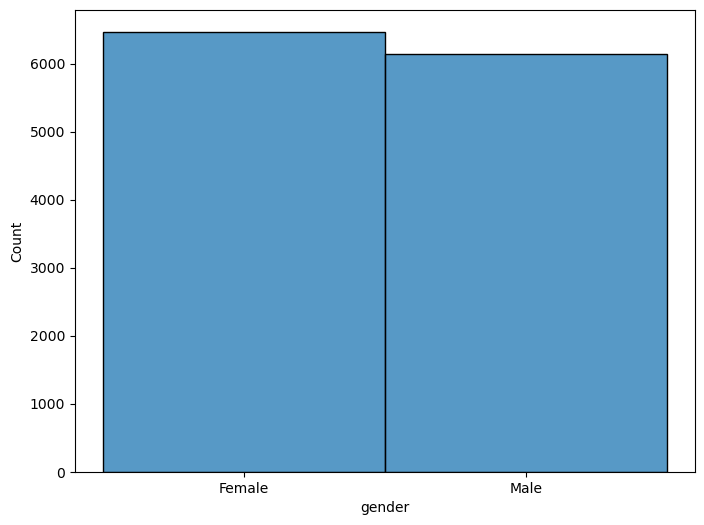

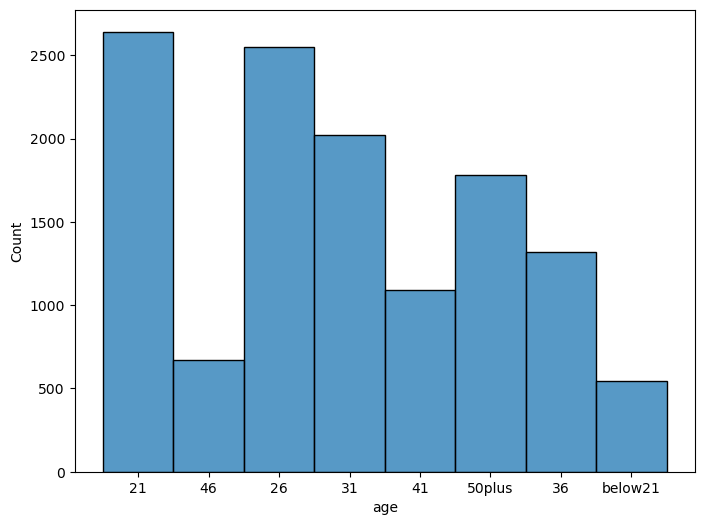

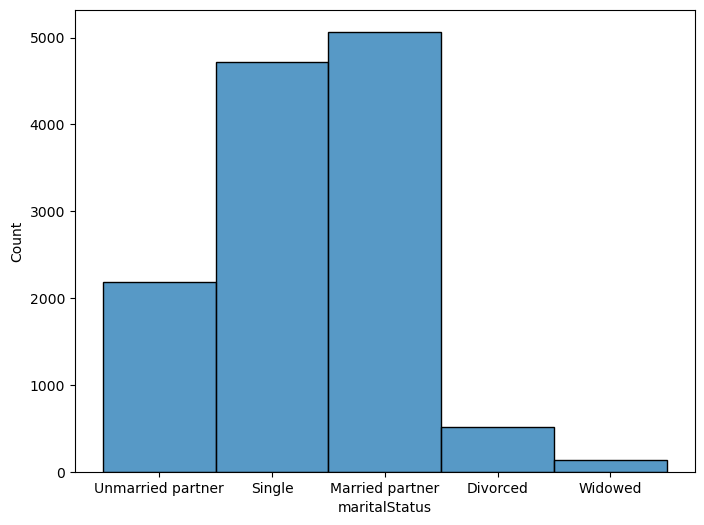

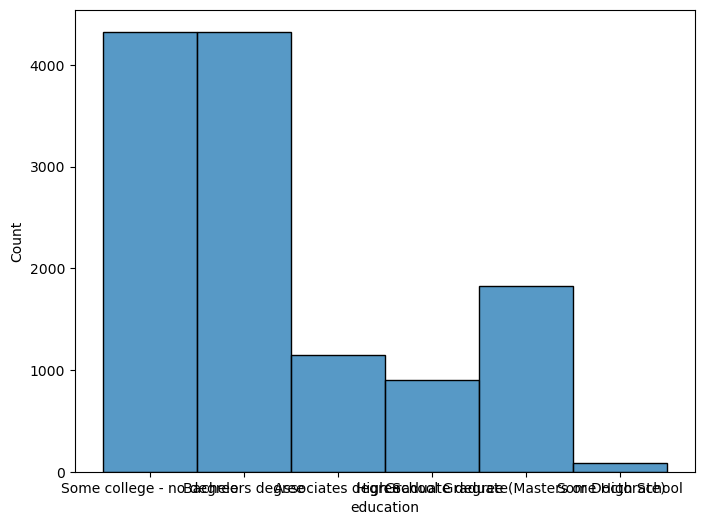

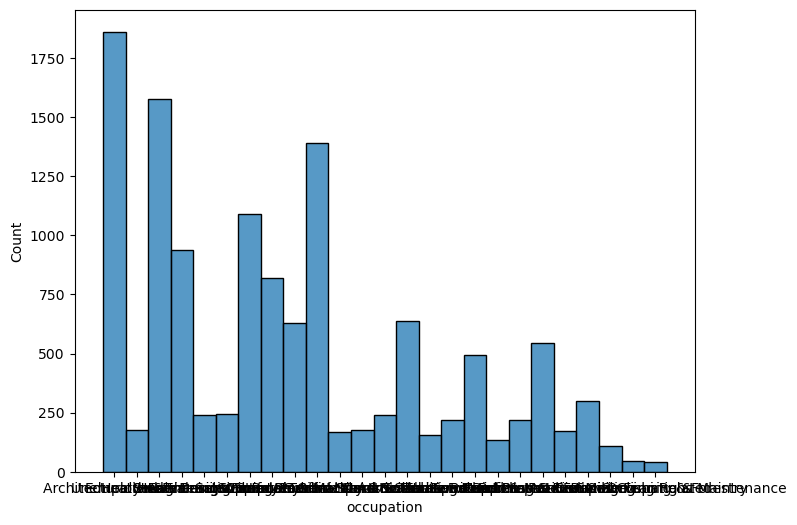

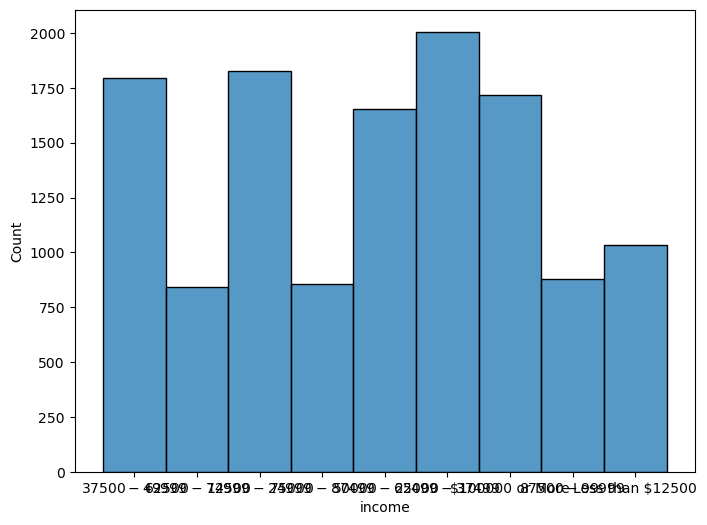

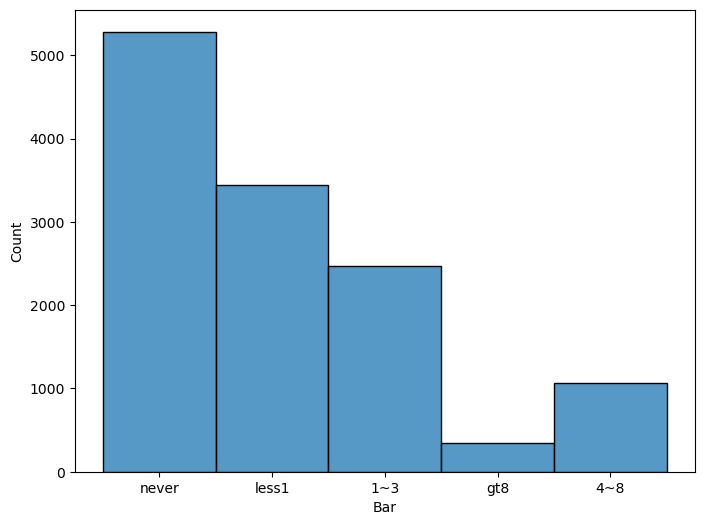

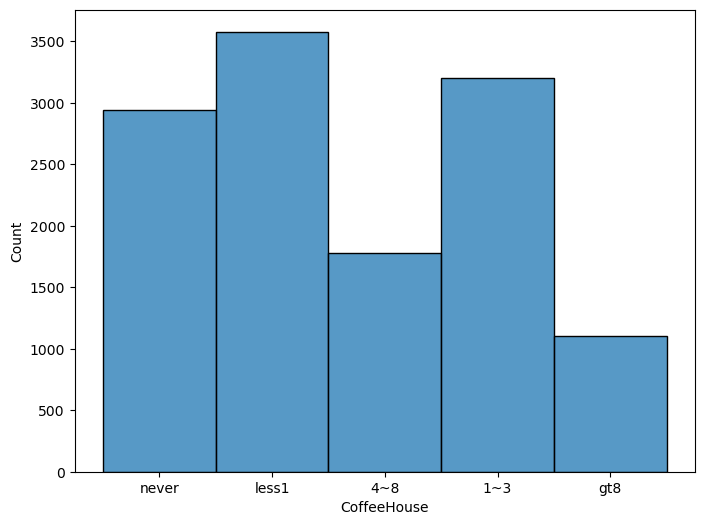

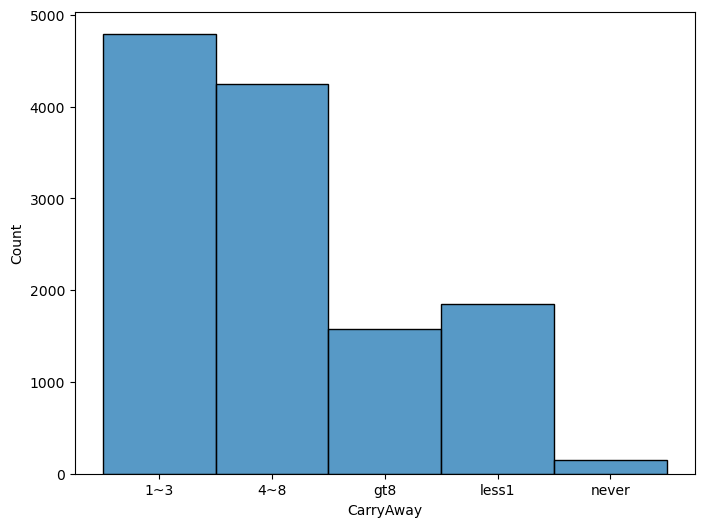

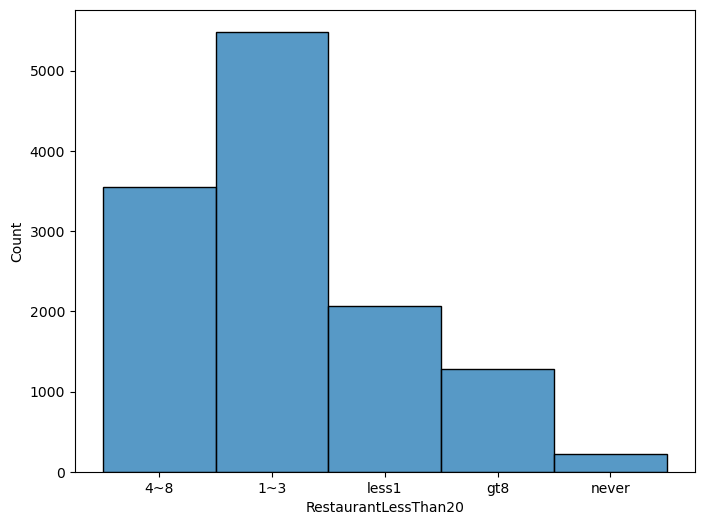

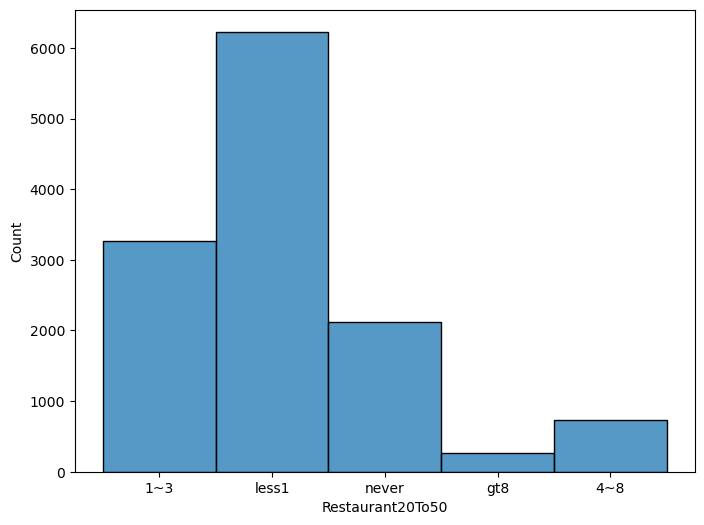

In [32]:
for i in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[i])
    plt.show()

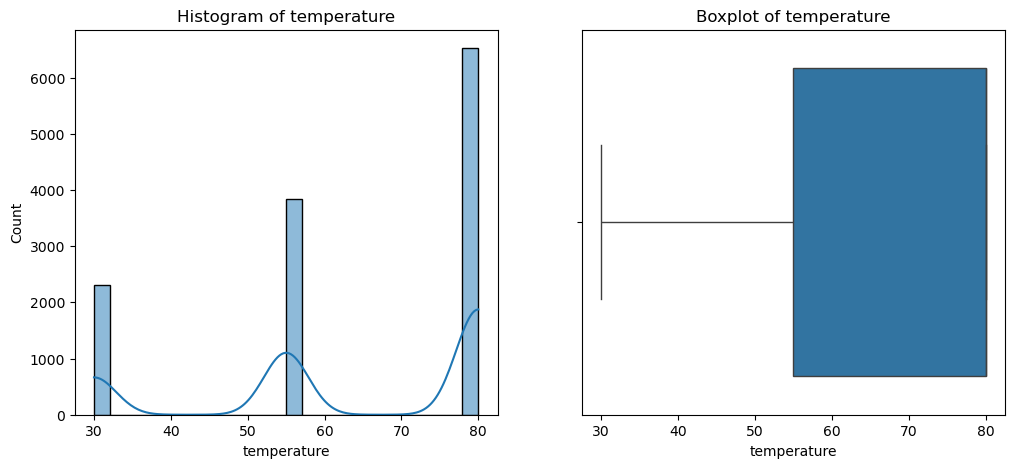

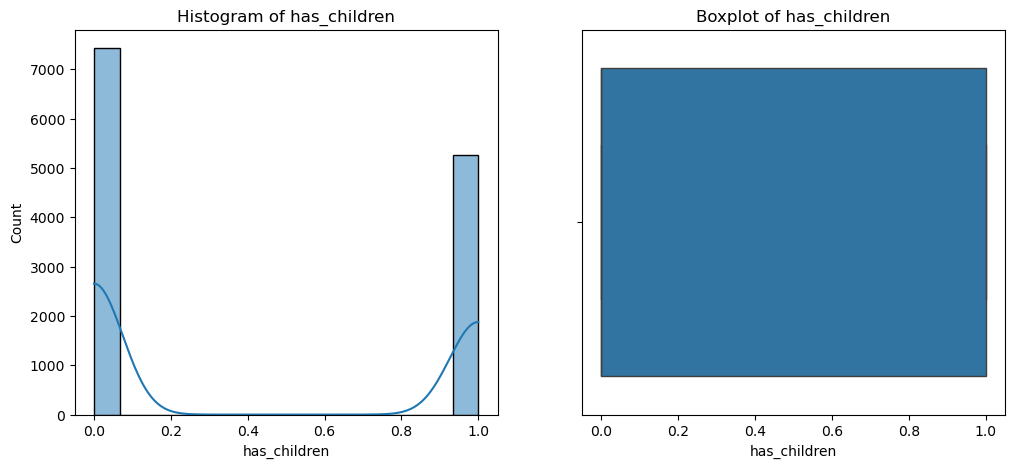

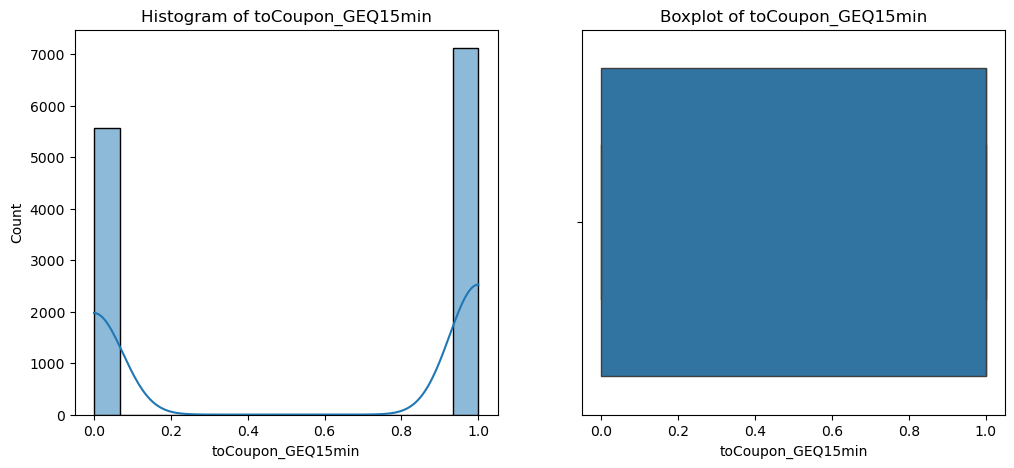

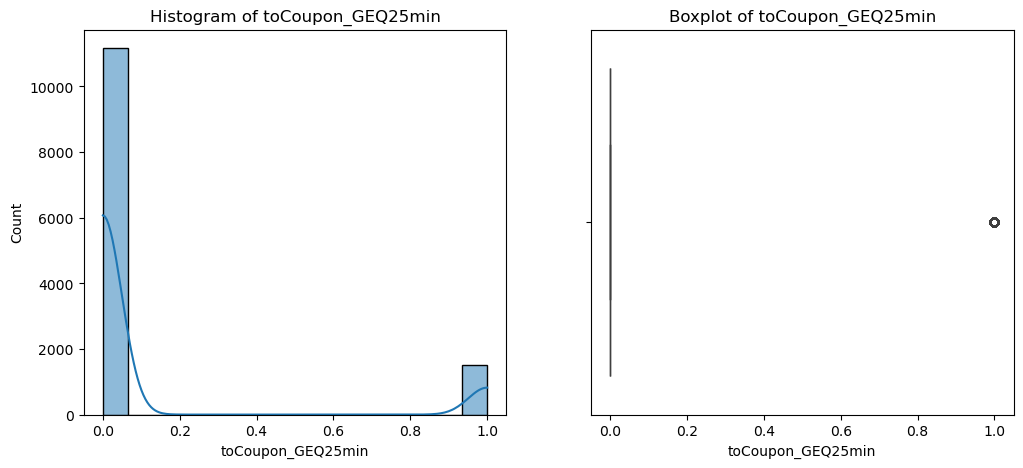

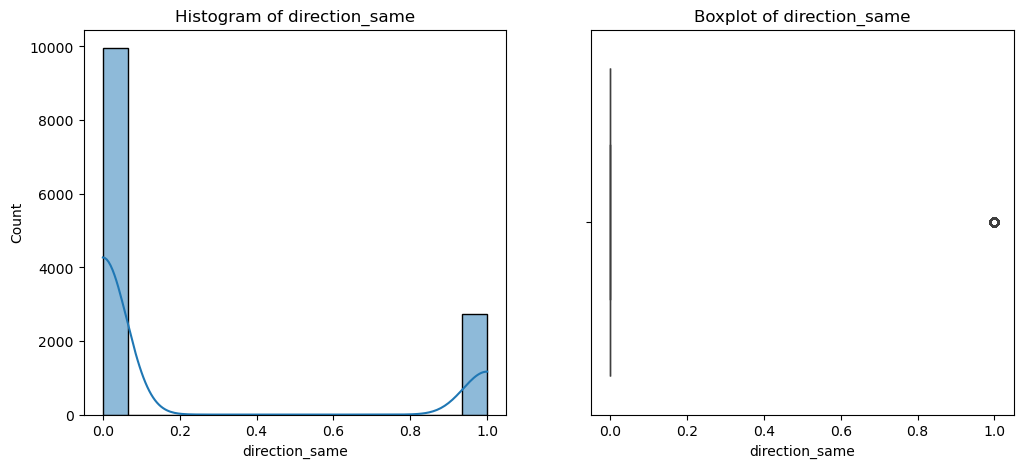

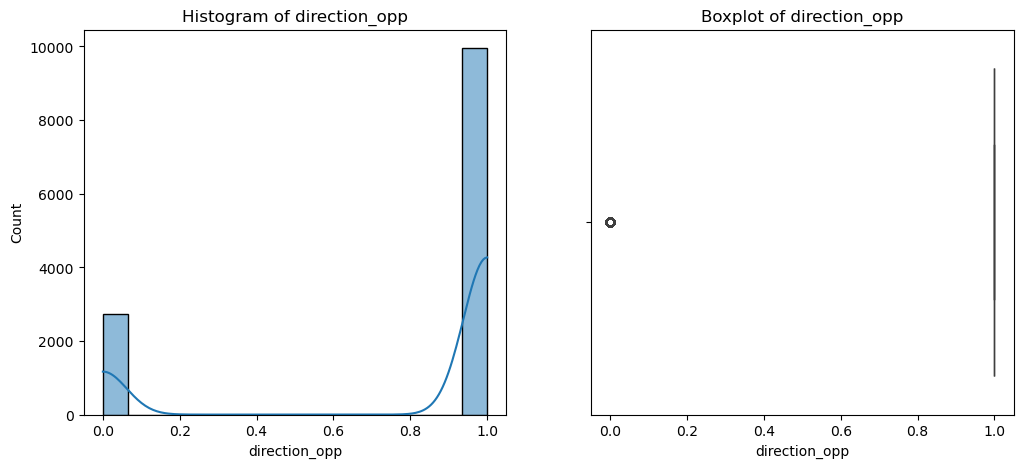

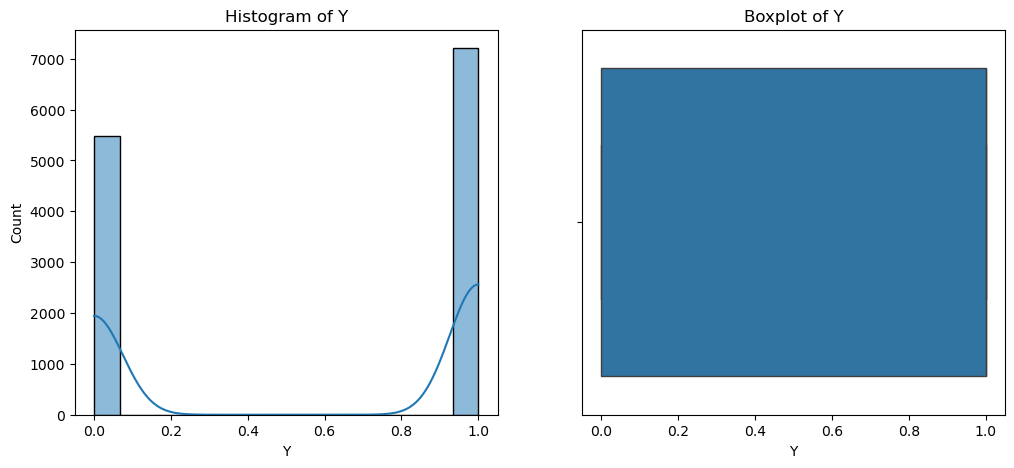

In [34]:
for column in numerical_df:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

In [36]:
# outlier
def Handling_Outliers(df):
    for col in df.select_dtypes(include = ['int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)

        #CAPPING OUTLIERS
        df[col]= df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return df

In [38]:
df1 = Handling_Outliers(df)

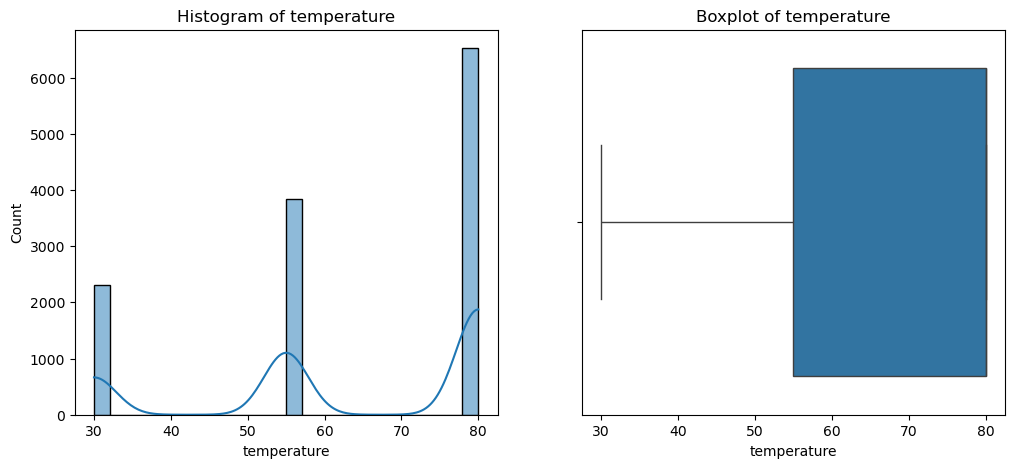

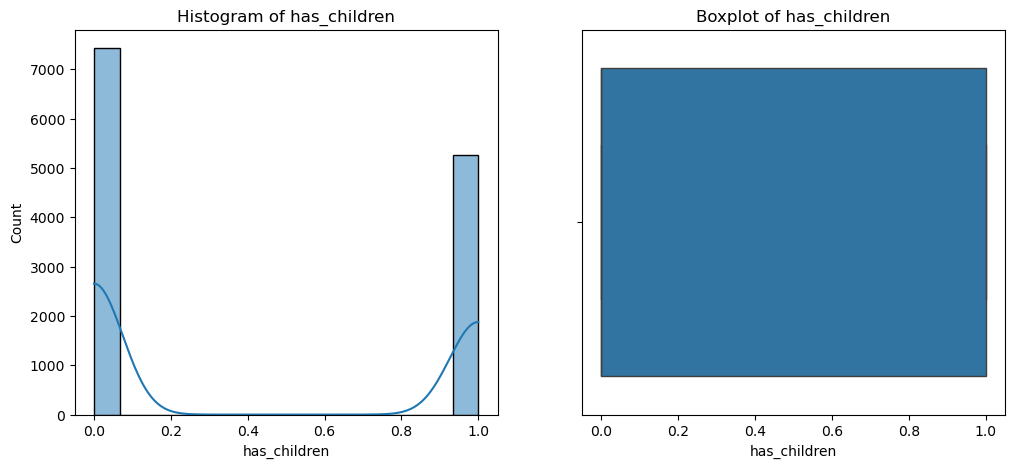

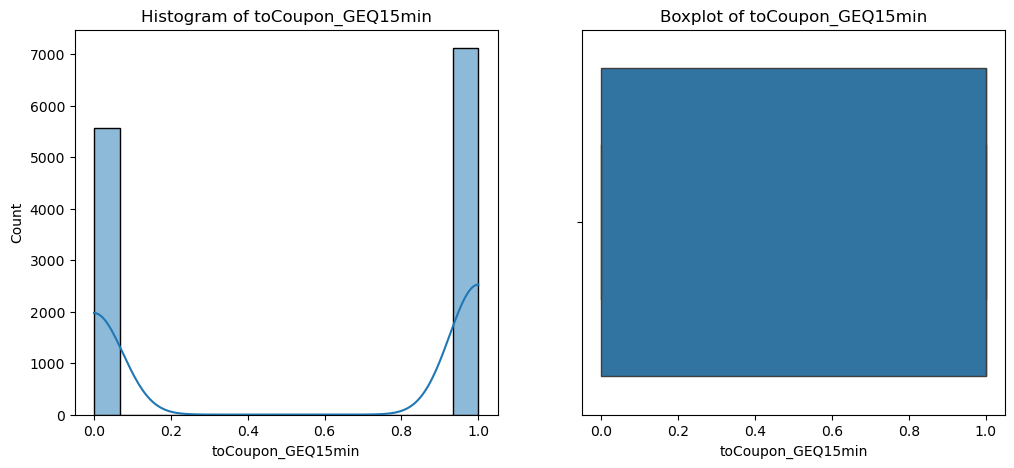

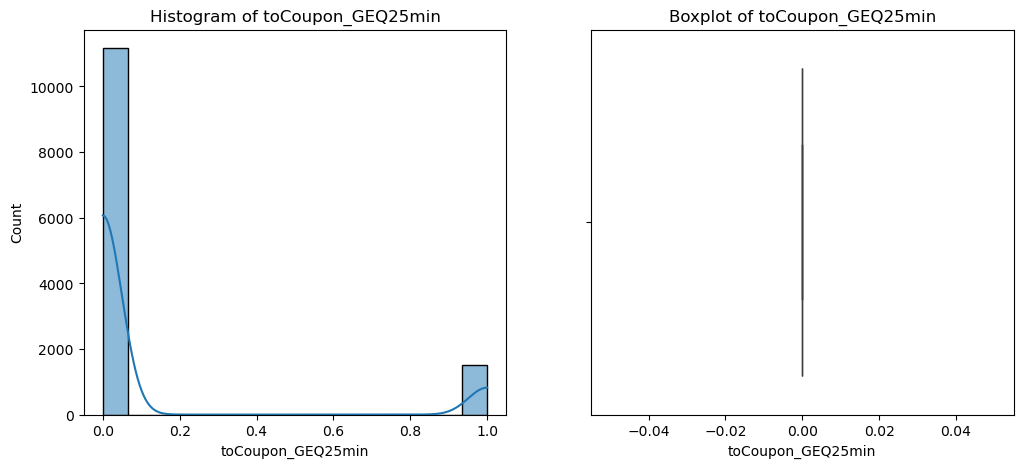

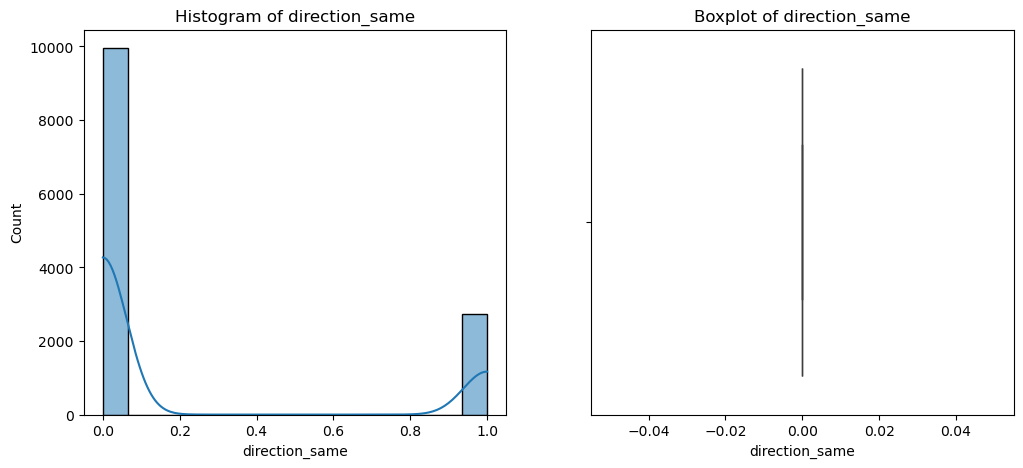

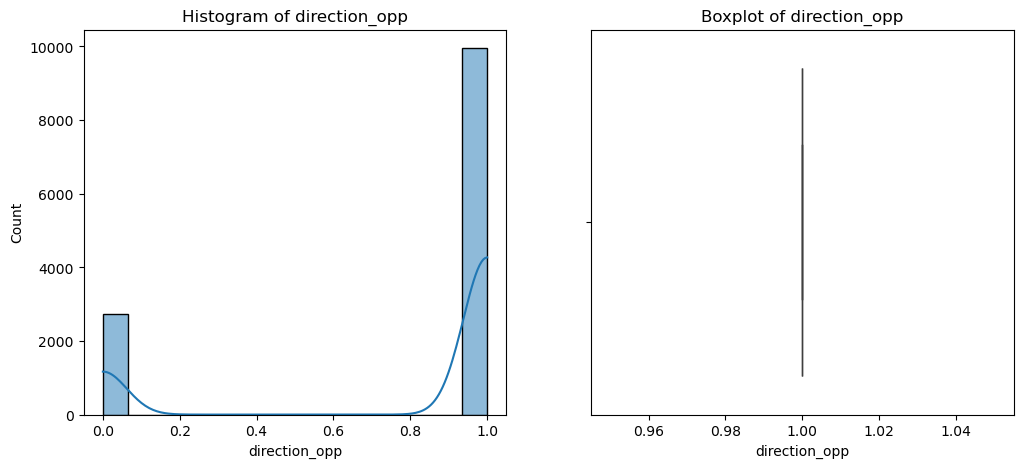

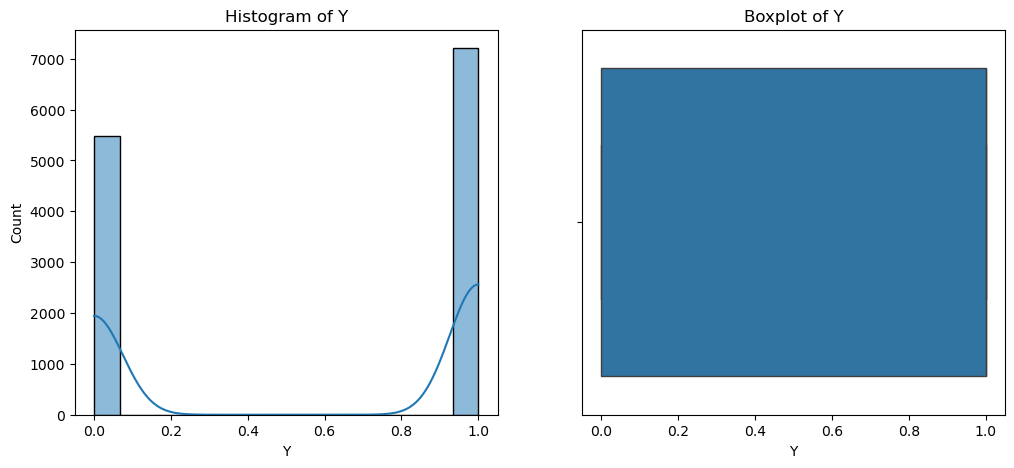

In [40]:
for column in numerical_df:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')

In [42]:
numerical_df.skew()

temperature         -0.640000
has_children         0.347102
toCoupon_GEQ15min   -0.240933
toCoupon_GEQ25min    2.398310
direction_same       1.383714
direction_opp       -1.383714
Y                   -0.272796
dtype: float64

In [44]:
correlation=numerical_df.corr()
correlation

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ15min,-0.157089,0.079434,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,-0.082693,-0.108139,0.014932,-0.014932,1.000000


Text(0.5, 1.0, 'correlation of vechicle coupon recommendation')

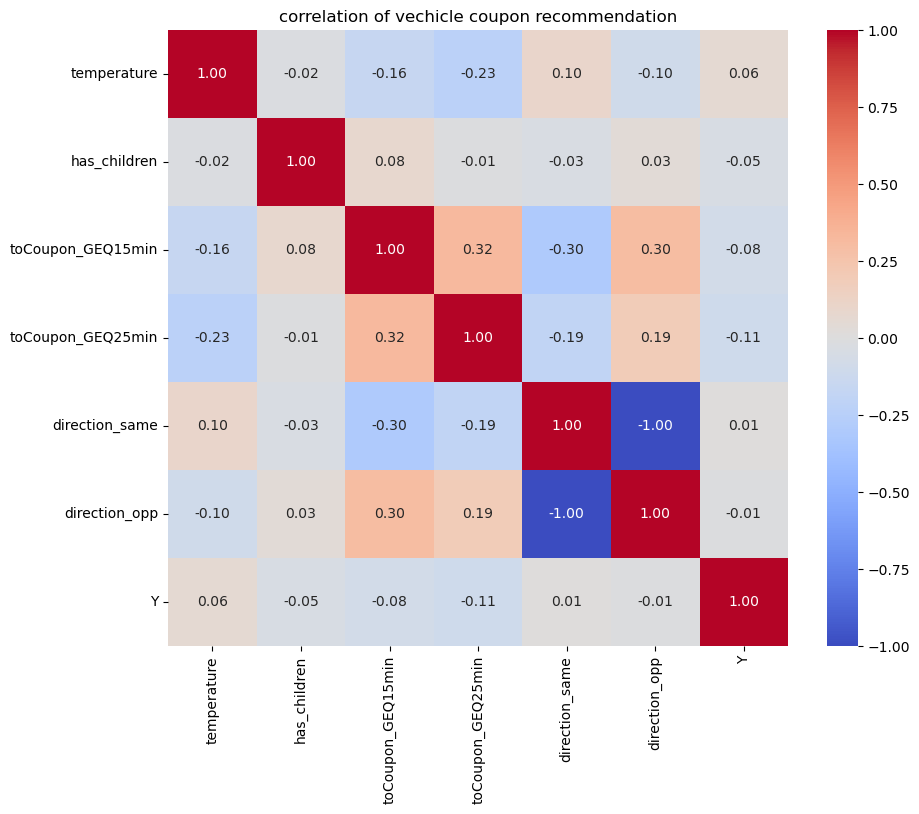

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('correlation of vechicle coupon recommendation')

In [58]:
# Here we can analyze wheather our data id balanced or not
target_value_count=df['Y'].value_counts()

In [60]:
target_value_count

Y
1    7157
0    5453
Name: count, dtype: int64

In [52]:
X = df1.drop(['Y'], axis = 1)
y = df1['Y']

In [54]:
X

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0.0,0.0,1.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0.0,0.0,1.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0.0,0.0,1.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0.0,0.0,1.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0.0,0.0,1.0
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0.0,0.0,1.0
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,0,0.0,0.0,1.0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,$75000 - $87499,never,never,1~3,4~8,1~3,1,0.0,0.0,1.0


In [56]:
y

0        1
1        0
2        1
3        0
4        0
        ..
12679    1
12680    1
12681    0
12682    0
12683    0
Name: Y, Length: 12610, dtype: int64

In [62]:
categorical_columns=df.select_dtypes(include="object")

In [64]:
# Select categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-Hot Encode categorical data
encoded_categorical_df = pd.get_dummies(X[categorical_columns], drop_first=True).astype(int)
# Print the encoded categorical DataFrame
print(encoded_categorical_df)


       destination_No Urgent Place  destination_Work  passanger_Friend(s)  \
0                                1                 0                    0   
1                                1                 0                    1   
2                                1                 0                    1   
3                                1                 0                    1   
4                                1                 0                    1   
...                            ...               ...                  ...   
12679                            0                 0                    0   
12680                            0                 1                    0   
12681                            0                 1                    0   
12682                            0                 1                    0   
12683                            0                 1                    0   

       passanger_Kid(s)  passanger_Partner  weather_Snowy  weather_Sunny  \

In [66]:
encoded_categorical_df = encoded_categorical_df.reset_index(drop=True)
numerical_df = numerical_df.reset_index(drop=True)

# Combine the encoded categorical columns with the scaled numerical columns
x = pd.concat([encoded_categorical_df,numerical_df], axis=1)

In [68]:
df2=x

In [70]:
df2.head()

,destination_No Urgent Place,destination_Work,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Snowy,weather_Sunny,time_10PM,time_2PM,time_6PM,...,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,55,1,0,0,0,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,80,1,0,0,0,1,0
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,80,1,1,0,0,1,1
3,1,0,1,0,0,0,1,0,1,0,...,0,0,0,80,1,1,0,0,1,0
4,1,0,1,0,0,0,1,0,1,0,...,0,0,0,80,1,1,0,0,1,0


In [72]:
df2.shape

(12610, 92)

# Feature Selection

In [74]:
X = df2.drop(['Y'], axis = 1)
y = df2['Y']

In [76]:
sk =  SelectKBest(score_func = f_classif, k = 25)
x_new = sk.fit_transform(X,y)
selected_features = X.columns[sk.get_support()]
feature_score = pd.DataFrame({'feature':X.columns,'Score':sk.scores_}).sort_values(by='Score',ascending=False)
print("selected_Fetaures:",selected_features)
print("\nFeature Score:")
print(feature_score)

selected_Fetaures: Index(['destination_No Urgent Place', 'destination_Work',
       'passanger_Friend(s)', 'weather_Snowy', 'weather_Sunny', 'time_10PM',
       'time_2PM', 'time_7AM', 'coupon_Carry out & Take away',
       'coupon_Coffee House', 'coupon_Restaurant(20-50)',
       'coupon_Restaurant(<20)', 'expiration_2h', 'age_50plus',
       'maritalStatus_Single', 'occupation_Retired', 'income_$75000 - $87499',
       'Bar_never', 'CoffeeHouse_4~8', 'CoffeeHouse_never', 'CarryAway_less1',
       'Restaurant20To50_never', 'temperature', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min'],
      dtype='object')

Feature Score:
                                              feature       Score
11                       coupon_Carry out & Take away  332.626930
14                             coupon_Restaurant(<20)  292.223403
0                         destination_No Urgent Place  223.941560
15                                      expiration_2h  212.477933
2                                 pas

In [78]:
X_selected = X[selected_features]

In [80]:
X_selected.columns

Index(['destination_No Urgent Place', 'destination_Work',
       'passanger_Friend(s)', 'weather_Snowy', 'weather_Sunny', 'time_10PM',
       'time_2PM', 'time_7AM', 'coupon_Carry out & Take away',
       'coupon_Coffee House', 'coupon_Restaurant(20-50)',
       'coupon_Restaurant(<20)', 'expiration_2h', 'age_50plus',
       'maritalStatus_Single', 'occupation_Retired', 'income_$75000 - $87499',
       'Bar_never', 'CoffeeHouse_4~8', 'CoffeeHouse_never', 'CarryAway_less1',
       'Restaurant20To50_never', 'temperature', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min'],
      dtype='object')

# Scalling

In [82]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 1.00620482, -0.57264959, -0.59438598, ..., -0.362279  ,
        -0.52418269,  0.52418269],
       [ 1.00620482, -0.57264959,  1.68240845, ..., -0.362279  ,
        -0.52418269,  0.52418269],
       [ 1.00620482, -0.57264959,  1.68240845, ..., -0.362279  ,
        -0.52418269,  0.52418269],
       ...,
       [-0.99383345,  1.74626862, -0.59438598, ..., -0.362279  ,
         1.90773184, -1.90773184],
       [-0.99383345,  1.74626862, -0.59438598, ...,  2.76030351,
        -0.52418269,  0.52418269],
       [-0.99383345,  1.74626862, -0.59438598, ..., -0.362279  ,
         1.90773184, -1.90773184]])

# Train Test Split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state =42)

In [86]:
X_train.shape

(10088, 91)

In [88]:
X_test.shape

(2522, 91)

In [90]:
print(f""" 
X_train shape : {X_train.shape}
X_test shape : {X_test.shape}
y_train shape : {y_train.shape}
y_test shape : {y_test.shape} 
""")

 
X_train shape : (10088, 91)
X_test shape : (2522, 91)
y_train shape : (10088,)
y_test shape : (2522,) 



# Model Building

In [92]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes":GaussianNB()
}
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"{model_name}:")
    print(f"Training Accuracy: {train_accuracy:.3f}")
    print(f"Testing Accuracy: {test_accuracy:.3f}")
    print()

Logistic Regression:
Training Accuracy: 0.693
Testing Accuracy: 0.683

Support Vector Machine:
Training Accuracy: 0.828
Testing Accuracy: 0.724

Random Forest:
Training Accuracy: 0.999
Testing Accuracy: 0.741

Decision Tree:
Training Accuracy: 0.999
Testing Accuracy: 0.676

Gradient Boosting:
Training Accuracy: 0.734
Testing Accuracy: 0.697

AdaBoost:
Training Accuracy: 0.687
Testing Accuracy: 0.665

Naive Bayes:
Training Accuracy: 0.629
Testing Accuracy: 0.616



In [106]:
# Define models with  regularizations
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', solver='liblinear', C=0.2, max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear', C=0.2),
    "Random Forest": RandomForestClassifier(n_estimators=25, max_features='sqrt', min_samples_split=2, min_samples_leaf=1),
    "Decision Tree": DecisionTreeClassifier(ccp_alpha=0.001),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.02),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0 ),
    "Naive Bayes":GaussianNB()
}

# Apply regularization and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Output the results
    print(f"{model_name}:")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

Logistic Regression:
Training Accuracy: 0.6931007137192704
Testing Accuracy: 0.6819984139571769

Support Vector Machine:
Training Accuracy: 0.6951823949246629
Testing Accuracy: 0.6851704996034893

Random Forest:
Training Accuracy: 0.9979183187946075
Testing Accuracy: 0.7379064234734338

Decision Tree:
Training Accuracy: 0.7047977795400476
Testing Accuracy: 0.6816019032513878

Gradient Boosting:
Training Accuracy: 0.6877478191911182
Testing Accuracy: 0.6708961141950832

AdaBoost:
Training Accuracy: 0.6868556701030928
Testing Accuracy: 0.6653449643140364

Naive Bayes:
Training Accuracy: 0.6292624900872323
Testing Accuracy: 0.6157811260904045



In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred,)}")
    print(f"F1-score: {f1_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

Logistic Regression:
Accuracy: 0.6819984139571769
Precision: 0.6950444726810674
Recall: 0.7725988700564972
F1-score: 0.7317725752508362
Confusion Matrix:
[[ 626  480]
 [ 322 1094]]

Support Vector Machine:
Accuracy: 0.6851704996034893
Precision: 0.7006451612903226
Recall: 0.7669491525423728
F1-score: 0.73229939312205
Confusion Matrix:
[[ 642  464]
 [ 330 1086]]

Random Forest:
Accuracy: 0.7307692307692307
Precision: 0.7403783431180692
Recall: 0.8015536723163842
F1-score: 0.7697524584604951
Confusion Matrix:
[[ 708  398]
 [ 281 1135]]

Decision Tree:
Accuracy: 0.6816019032513878
Precision: 0.6886153846153846
Recall: 0.7902542372881356
F1-score: 0.7359421243012167
Confusion Matrix:
[[ 600  506]
 [ 297 1119]]

Gradient Boosting:
Accuracy: 0.6708961141950832
Precision: 0.6651634723788049
Recall: 0.8333333333333334
F1-score: 0.7398119122257053
Confusion Matrix:
[[ 512  594]
 [ 236 1180]]

AdaBoost:
Accuracy: 0.6653449643140364
Precision: 0.6819338422391857
Recall: 0.7570621468926554
F1-scor

# hyperparameter tuning

In [98]:
rf = RandomForestClassifier(random_state=42)


In [102]:
#  RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,             # Only test 10 random combinations
    scoring='accuracy',
    cv=2,                   # Use 2-fold cross-validation (faster)
    n_jobs=-1,              
    verbose=1,
    random_state=42
)


In [100]:
param_dist = {
    'n_estimators': [50, 100, 150],   # Fewer options for quicker search
    'max_depth': [5, 10, 15],         # Limit depth range
    'min_samples_split': [2, 5],      
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True]
}

In [104]:
# Fit the model
random_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy', verbose=1)

In [107]:
print("Best Parameters:", random_search.best_params_)
print("accuracy:", random_search.best_score_)

Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
accuracy: 0.7295796986518636


# Best model 

In [110]:
best_model = random_search.best_estimator_

In [129]:
y_pred = best_model.predict(X_test)

In [131]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [133]:
print(f"Test Accuracy: {accuracy}")
print(f"Test Weighted F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7268041237113402
Test Weighted F1 Score: 0.7219390389154976

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.66      1106
           1       0.72      0.83      0.77      1416

    accuracy                           0.73      2522
   macro avg       0.73      0.71      0.71      2522
weighted avg       0.73      0.73      0.72      2522



In [139]:
joblib.dump(best_model,"RandomForest.joblib")

['RandomForest.joblib']

In [ ]:
load_model = joblib.load("RandomForest")

# Pipeline

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import joblib

# Define the numerical and categorical columns
numerical_cols = ['age', 'temperature', 'has_children', 'toCoupon_GEQ15min']
categorical_cols = ['destination', 'passanger', 'time', 'coupon', 'expiration', 'education', 'maritalStatus', 'gender','income' ]


# Define the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with mean
    ('scaler', StandardScaler())  # Scale the numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Define the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier())
])

# Display the pipeline
print("Pipeline steps:")
print(pipe.named_steps)

# Train the pipeline using the entire dataset
pipe.fit(X, y)

# Save the trained pipeline
joblib.dump(pipe, 'pipeline.joblib')

Pipeline steps:
{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'temperature', 'has_children',
                                  'toCoupon_GEQ15min']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['destination', 'passanger', 'time', 'coupon',
                                  'expiration', 'education', 'maritalStatus',
                                  'gender', 'income'])]), 'rf': RandomForestClassifier()}


ValueError: A given column is not a column of the dataframe

In [149]:
# Load the saved pipeline
loaded_pipe = joblib.load('pipeline.joblib')


In [151]:
df_test = pd.read_csv('unseen.csv')

In [153]:
predictions = loaded_pipe.predict(df_test)

In [155]:
df_test['y_predicted']=predictions

In [157]:
df_test.head()

,destination,passanger,temperature,time,coupon,expiration,gender,age,maritalStatus,income,has_children,education,toCoupon_GEQ15min,y_predicted
0,No Urgent Place,Alone,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,0,1
1,No Urgent Place,Friend(s),80,10AM,Coffee House,2h,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,0,1
2,No Urgent Place,Friend(s),80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,1,0
3,No Urgent Place,Friend(s),80,2PM,Coffee House,2h,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,1,0
4,No Urgent Place,Friend(s),80,2PM,Coffee House,1d,Female,21,Unmarried partner,$37500 - $49999,1,Some college - no degree,1,0


In [159]:
joblib.dump(pipe, 'RFC_model.joblib')

['RFC_model.joblib']

# conclusion
The analysis of whether a person accepts a coupon in different driving scenarios has provided valuable insights into consumer behavior in transit. By identifying key factors such as user demographics, driving conditions, coupon details, and situational contexts, the study highlights the patterns and conditions under which coupons are more likely to be accepted.

# Future Work


* It would be interesting to learn the issue of combining deep learning methods, such as reinforcement learning or neural collaborative filtering
* We can come up with more feature engineering using clustering
* We can also try other models like CatBoost Classifier,xgboost 